In [1]:
import sys
import numpy as np 
import pandas as pd
import warnings
import sympy 
import matplotlib as plt
warnings.filterwarnings('ignore')

from copy import deepcopy
from ipywidgets import IntProgress
from IPython.display import display

sys.path.append('./')
sys.path.append('./Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

#File related libraries
from expression_writter import *

#Writing files libraries
import re
from file_creator import *
import os
import pickle

In [2]:
def plot_graph(xp, yp, probtreefile, savedir):
    plt.scatter(xp, yp, alpha = 0.1)
    plt.xlabel("-log(Prob_Tree)")
    plt.ylabel("Descrtiption Length")
    titleName = probtreefile.split("/")[-1].split("_")[0]
    plt.title(f"Probability Comparison :{titleName} ")
    savePath = os.path.join(savedir, titleName + ".png")
    print(savePath)
    plt.savefig(savePath, dpi = 100, bbox_inches = 'tight')

# M1

In this case the procedure has been the following.
1. Generate a set of expressios with the BMS using a dataset (NGuyen^C)
2. Train a tree with each of these datasets.
3. Compare the probability of generating the expressions in the dataset used for 2 between the trained tree and the BMS.

In [3]:
ProbTreeFile = "./KL/Probabilty_Trees/BMS_With_prior_nv2_np20.txt_GREEDY"
ExpressionFile = "./Results_Leo/Filtered_Datasets/Filetered_BMS_With_prior_nv2_np20_v2.txt"
directoryPrior = "./Prior/"

./KL/Prob_Comparison/M1/BMS.png


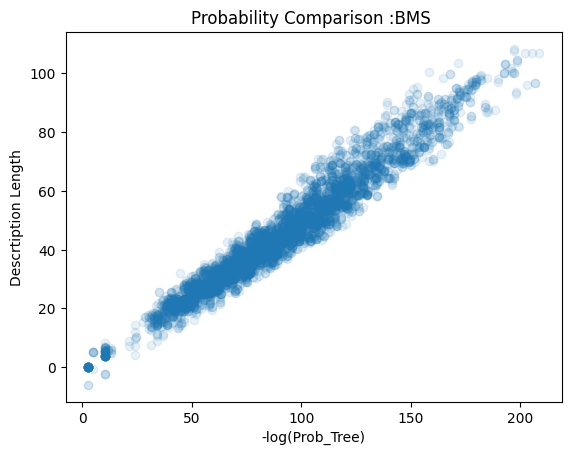

In [4]:
with open(ProbTreeFile, 'rb') as f:
    probTree = pickle.load(f)

all_desc_length_y=[]
all_probtree_prob = []


with open(ExpressionFile, 'r') as f:
    for line in f:
        desc_length , expression = float(line.strip().split("||")[0]) , line.strip().split("||")[1]
        all_desc_length_y.append(desc_length)
        probTree.tree.build_from_string(expression)
        all_probtree_prob.append(probTree.pr_tree())

minus_log_probtree_x = -1* np.log(all_probtree_prob)
plot_graph(minus_log_probtree_x, all_desc_length_y, probtreefile=ProbTreeFile, savedir="./KL/Prob_Comparison/M1/")

# M2

In this case the procedure has been the following.
1. Generate a set of expressios with the BMS using a dataset (NGuyen^C)
2. Train a tree with each of these datasets.
3. With the BMS and the dataset used in 1., create new expressios that were no used to train the tree.
4. Compare probabilities of these new expressions between the tree and the BMS.

The expressions in step 4 will be generated by sampling the BMS with the NGuyen^C dataset and filtering those expressions that already appeared in the training.

In [25]:
ProbTreeFile = "./KL/Probabilty_Trees/BMS_With_prior_nv2_np20.txt_GREEDY"
old_expressions_file = './Results_Leo/Filtered_Datasets/Filetered_BMS_With_prior_nv2_np20_v2.txt'
new_expressions_file = './Results_Leo/New_Datasets/BMS_With_prior_nv2_np20.txt'

In [26]:
with open(old_expressions_file, 'r') as f:
    expressions = set()
    for line in f:
        energy, expression = float(line.split("||")[0]), line.split("||")[1].strip()
        #energ_exp_tuple = (energy, expression)
        #expressions.add(energ_exp_tuple)
        expressions.add(energy)

In [27]:
with open(new_expressions_file, 'r') as f:
    new_expressions = set()
    for line in f:
        energy, expression = float(line.split("||")[1]), line.split("||")[2]
        energ_exp_tuple = (energy, expression)
        if energy not in expressions:
            new_expressions.add(energ_exp_tuple)
            
path = os.path.abspath(new_expressions_file)  
filtered_dir = './Results_Leo/New_Datasets/Filtered_Datasets/'  
filtered_name = f"Filtered_{os.path.basename(path)}"  
filtered_new_expressions_file = os.path.join(filtered_dir, filtered_name)  

with open(filtered_new_expressions_file, 'w') as f:
    for ele in new_expressions:
        f.write(f"{ele[0]}||{ele[1]}\n")
    

Once the expressions have been filtered we can proceed to evaluate the performance.

./KL/Prob_Comparison/M2/BMS.png


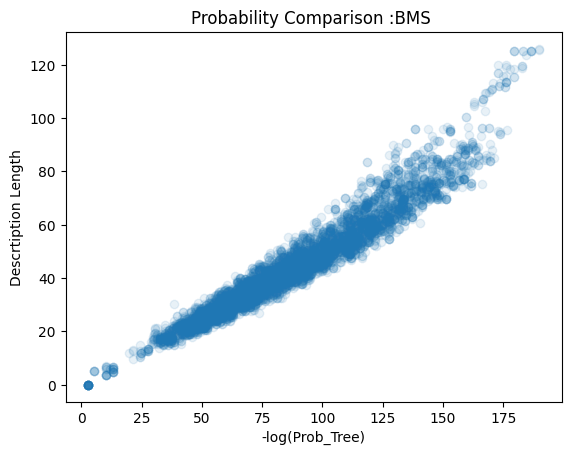

In [28]:
with open(ProbTreeFile, 'rb') as f:
    probTree = pickle.load(f)

all_desc_length_y=[]
all_probtree_prob = []


with open(filtered_new_expressions_file, 'r') as f:
    for line in f:
        desc_length , expression = float(line.strip().split("||")[0]) , line.strip().split("||")[1]
        all_desc_length_y.append(desc_length)
        probTree.tree.build_from_string(expression)
        all_probtree_prob.append(probTree.pr_tree())

minus_log_probtree_x = -1* np.log(all_probtree_prob)
plot_graph(minus_log_probtree_x, all_desc_length_y, probtreefile=ProbTreeFile, savedir="./KL/Prob_Comparison/M2/")

## M3

In this case the procedure has been the following.
1. Generate a set of expressios with the BMS using a dataset (NGuyen^C)
2. Train a tree with each of these datasets.
3. Generate random expressions with the tree.
4. Compare probabilities of these new expressions between the tree and the BMS.

In [24]:
ProbTreeFile = "./KL/Probabilty_Trees/BMS_With_prior_nv2_np20.txt_GREEDY"
expressions_file = './KL/Generated_expressions/BMS_With_prior_nv2_np20.txt_GREEDY_Expressions'

./KL/Prob_Comparison/M3/BMS.png


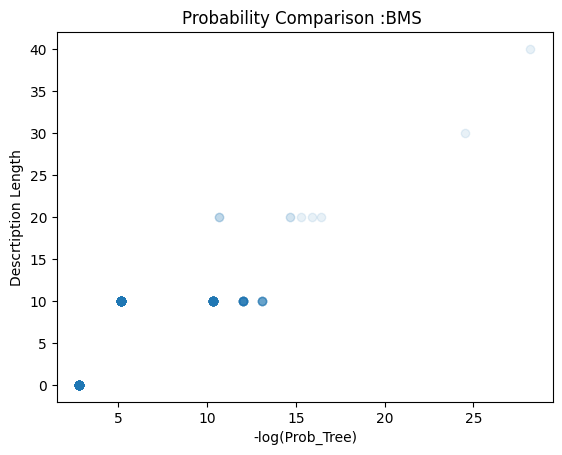

In [25]:
with open(ProbTreeFile, 'rb') as f:
    probTree = pickle.load(f)

all_desc_length_y=[]
all_probtree_prob = []

with open(expressions_file, 'r') as f:
    for line in f:
        expression = line.strip()
        probTree.tree.build_from_string(expression)
        bms = probTree.tree
        bms.get_sse(fit = True)
        bms.get_bic(fit = False)
        bms.get_energy(reset= True)
        all_desc_length_y.append(bms.E)
        all_probtree_prob.append(probTree.pr_tree())

minus_log_probtree_x = -1* np.log(all_probtree_prob)
plot_graph(minus_log_probtree_x, all_desc_length_y, probtreefile=ProbTreeFile, savedir="./KL/Prob_Comparison/M3/")
